<a href="https://colab.research.google.com/github/ruchithareddy269/Dm-assignment-9/blob/main/256_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction
 Instructions
Write a colab for dimensionality reduction techniques for various data sets.

The colab should include:
a) PCA, SVD, MDS, ISOMap, LLE
b) UMAP and t-sne

Do proper visualization as well as techniques showcasing selecting the hyperparameter.

Use UMAP visualizer and provide screenshots.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
dataset_file_path = '/content/drive/MyDrive/realtor-data.zip.csv'


In [10]:
# Load the dataset
file_path = dataset_file_path
data = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

In [12]:
data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


## Data Visualizations

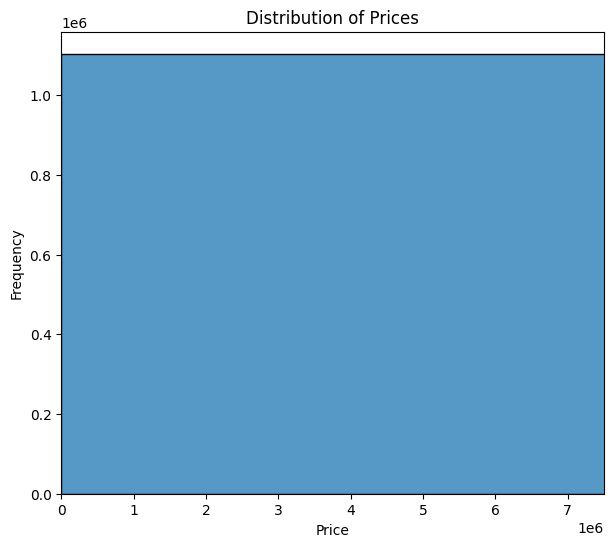

In [16]:
plt.figure(figsize=(7, 6))
sns.histplot(data['price'], bins=30)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, data['price'].quantile(0.99))  # Limiting x-axis to 99th percentile for better visualization
plt.show()


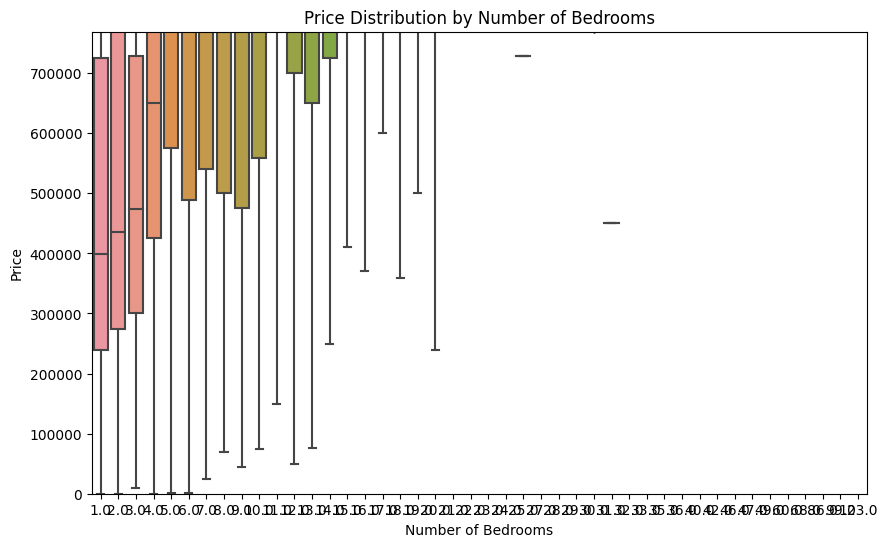

In [19]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='bed', y='price', data=data)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.ylim(0, data['price'].quantile(0.70))  # Limiting y-axis to 99th percentile for better visualization
plt.show()


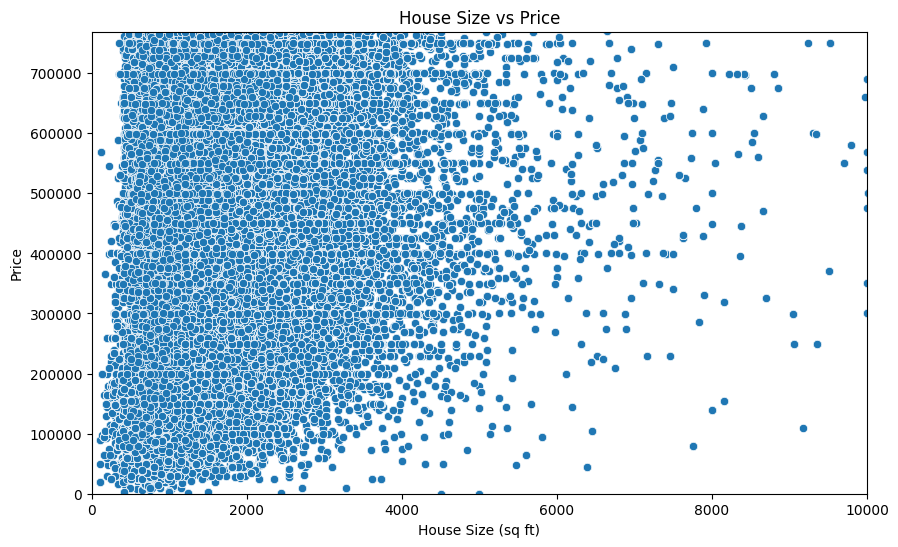

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_size', y='price', data=data)
plt.title('House Size vs Price')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.xlim(0, 10000)  # Limiting x-axis for better visualization
plt.ylim(0, data['price'].quantile(0.70))  # Limiting y-axis to 99th percentile for better visualization
plt.show()


## PCA

In [22]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])

In [23]:
numerical_data_filled = numerical_data.fillna(numerical_data.mean())
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data_filled)

In [24]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_data_scaled)

In [25]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [26]:
pca_df.head()

,PC1,PC2
0,-0.464536,-1.604860
1,-0.055626,-1.672238
2,-1.142736,-1.498773
3,-0.003246,-1.636367
4,0.661067,-1.773910


In [27]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.34588896, 0.17318555])

<ipython-input-30-b4fbe756dd61>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PC1', y='PC2', data=pca_df, palette="bright")


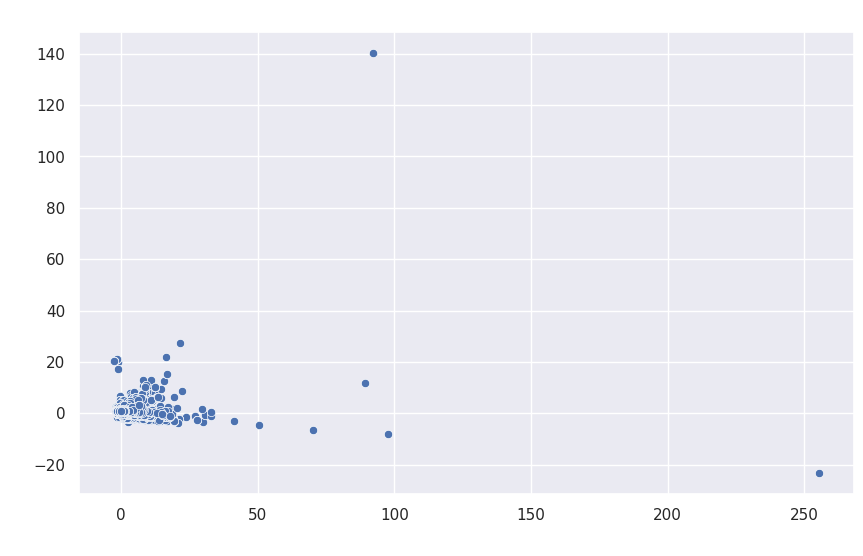

In [30]:
# Setting the style for the plots
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, palette="bright")
plt.title('Scatter Plot of Principal Components', color='white')
plt.xlabel('Principal Component 1', color='white')
plt.ylabel('Principal Component 2', color='white')
plt.show()


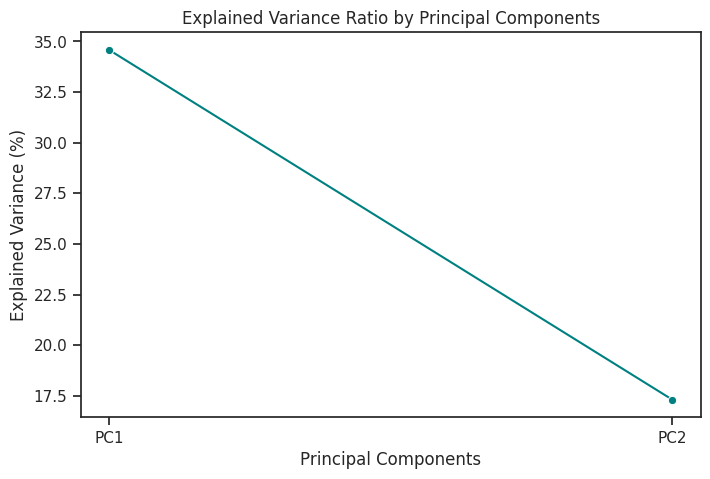

In [32]:
# Setting the style for the plots
sns.set(style="ticks")

# Explained variance ratio plot using a line plot
plt.figure(figsize=(8, 5))
sns.lineplot(x=['PC1', 'PC2'], y=explained_variance_ratio*100, color='teal', marker='o')
plt.title('Explained Variance Ratio by Principal Components')
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.show()



### **PCA  Overview:**

### Scatter Plot of Principal Components: This visualization represents the dataset within the framework of the first two principal components, PC1 and PC2. It is instrumental in revealing potential clusters or discernible patterns, providing insights into the data's structure as influenced by these principal dimensions.

### Explained Variance Ratio Plot: Presented as a bar chart, this plot illustrates the proportion of the total variance within the dataset attributed to each of the first two principal components. This plot is essential for understanding the extent of information encapsulated by PC1 and PC2, offering a measure of their significance in capturing the dataset's variability.

## **Singular Value Decomposition (SVD) Analysis:**

Before applying Singular Value Decomposition to the dataset, a crucial preparatory phase is required. This initial phase involves meticulous data preprocessing to ensure compatibility with SVD's requirements. Key steps in this phase include:

Addressing Missing Values: It's imperative to identify and appropriately handle any missing values in the dataset. This can involve imputation, removal, or other techniques to ensure a complete dataset for the analysis.

Focusing on Numerical Data: Singular Value Decomposition demands numerical data for its operation. Therefore, the dataset must be filtered or transformed to retain only numerical columns, discarding or converting non-numerical data as necessary.

Upon the successful completion of these preprocessing steps, the dataset will be primed for the application of Singular Value Decomposition. This will allow for the extraction of valuable insights regarding the underlying structure of the data.

In [33]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

In [36]:
data = pd.read_csv(dataset_file_path)

# Selecting numerical columns
numerical_data = data.select_dtypes(include=['float64'])

# Imputing missing values with the mean
imputer = SimpleImputer(strategy='mean')
numerical_data_imputed = imputer.fit_transform(numerical_data)

In [37]:
scaler = StandardScaler()
numerical_data_standardized = scaler.fit_transform(numerical_data_imputed)

### **Applying SVD**

In [38]:
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(numerical_data_standardized)

In [39]:
explained_variance = svd.explained_variance_ratio_

**SVD Visualization**

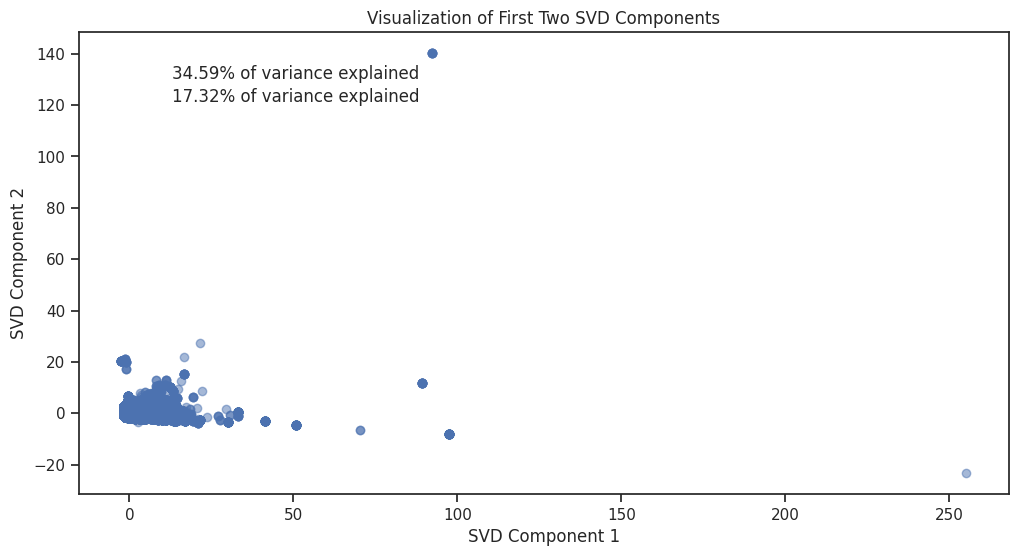

In [41]:
import matplotlib.pyplot as plt

# Creating the plot to visualize the SVD results
plt.figure(figsize=(12, 6))

# Generating a scatter plot for the first two SVD components
plt.scatter(svd_result[:, 0], svd_result[:, 1], alpha=0.5)
plt.title('Visualization of First Two SVD Components')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')

# Adding annotations to indicate the percentage of variance explained by each component
plt.annotate(f'{explained_variance[0] * 100:.2f}% of variance explained',
             xy=(0.1, 0.9), xycoords='axes fraction')
plt.annotate(f'{explained_variance[1] * 100:.2f}% of variance explained',
             xy=(0.1, 0.85), xycoords='axes fraction')

plt.show()


## MDS  

MDS is particularly useful in visualizing high-dimensional data in a lower-dimensional space (usually two or three dimensions), which can reveal patterns or relationships in the data that might not be immediately apparent.

To apply MDS to the dataset, we would follow these general steps:

### Preprocessing:

Select the relevant numerical features for the analysis.
Handle missing values, either by imputation or by removing rows or columns with missing data.
Normalize or standardize the data, as MDS can be sensitive to the scale of the features.
### Computing Distance Matrix:

Calculate a distance matrix that represents the pairwise distances between data points. Common distance measures include Euclidean, Manhattan, or cosine distance.
Applying MDS:

Use an MDS algorithm to project the high-dimensional data into a lower-dimensional space (e.g., 2D or 3D) based on the distance matrix.
Metric MDS tries to preserve the actual distances as much as possible, while non-metric MDS aims to preserve the order of the distances.
Visualization and Interpretation:

Visualize the results in a scatter plot.
Analyze and interpret the positions and distances of points in the reduced-dimensional space to understand underlying patterns in the data.
It might be beneficial to first apply a technique like PCA to reduce the dimensionality of the data, and then apply MDS on this reduced set for more efficient computation and possibly clearer insights.

In [43]:
data_subset = data.select_dtypes(include=['float64']).dropna().sample(n=500, random_state=0)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_subset)

In [45]:
# Applying MDS

from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=0)
mds_result = mds.fit_transform(data_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


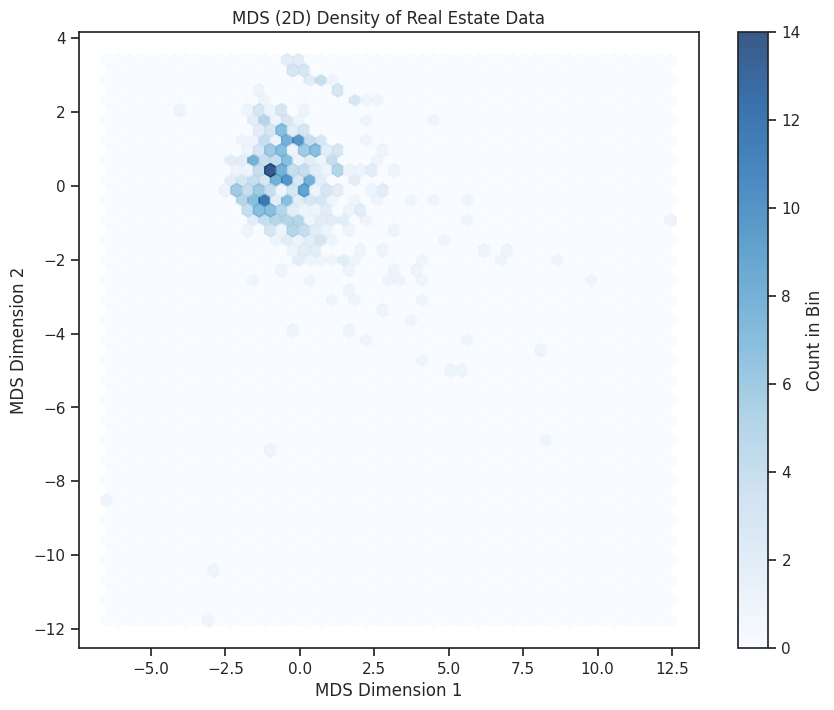

In [47]:
plt.figure(figsize=(10, 8))
plt.hexbin(mds_result[:, 0], mds_result[:, 1], gridsize=50, cmap='Blues', alpha=0.8)
plt.colorbar(label='Count in Bin')
plt.title('MDS (2D) Density of Real Estate Data')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.show()

## MDS Insights

Here's a breakdown of the insights derived from the Multidimensional Scaling (MDS) analysis conducted on a portion of the real estate dataset, which effectively condenses high-dimensional data into a two-dimensional representation:

Identification of Clusters and Patterns:

The MDS plot may reveal distinct clusters, indicating groups of real estate properties sharing common attributes. These clusters might reflect similarities in various features such as price, size, or the number of bedrooms and bathrooms.
Points that cluster together suggest properties with similar characteristics, while those that are dispersed imply a diversity in property features.
Analysis of Outliers:

Outliers within the MDS plot, which are points significantly distant from main groupings, potentially represent unique or anomalous properties. These could include homes with exceptional attributes like extraordinary pricing, size dimensions, or atypical room counts.
Understanding Relative Proximity:

The MDS visualization helps in comprehending the proximity of properties in terms of their attributes. Closer proximity on the plot suggests greater similarity in property characteristics.
It is important to note that MDS primarily preserves relative distances, meaning that exact distances on the plot do not directly translate to precise differences in property features. The key takeaway from MDS is the relative positioning and similarity between data points.

## ISOMAP Overview

ISOMAP (Isometric Mapping) stands out as a significant method in the realm of manifold learning, a branch of machine learning focused on dimensionality reduction. This technique is particularly advantageous in scenarios where traditional linear methods like PCA (Principal Component Analysis) are inadequate.

Essential Characteristics of ISOMAP:

Nonlinear Dimensionality Reduction:

The core objective of ISOMAP is to reveal the underlying nonlinear structure, or manifold, embedded within high-dimensional data. This approach goes beyond the limitations of linear models to capture more complex data relationships.
Geodesic Distance Estimation:

ISOMAP distinguishes itself by estimating geodesic distances, which are calculated along the manifold's curves. This approach is key to understanding the data's intrinsic geometry, as opposed to just relying on straight-line (Euclidean) distances.
Construction of a Neighborhood Graph:

The process begins with the creation of a neighborhood graph. In this graph, each data point is linked to its nearest neighbors, determined either by a fixed number of neighbors (k-nearest approach) or a set radius.
Shortest Path Distance Matrix Computation:

ISOMAP computes the shortest path distances between all point pairs within the neighborhood graph. These distances serve as approximations of the geodesic distances on the manifold, capturing the essential geometry of the data structure.
Application of Multidimensional Scaling (MDS):

The technique culminates with the use of MDS. This step embeds the data into a lower-dimensional space, making it a priority to preserve the calculated geodesic distances to the greatest extent possible.

### Applications of ISOMAP:

Handling Nonlinear Data Structures:

ISOMAP is particularly effective for datasets that are structured around curved manifolds. It excels in scenarios where the objective is to unfold these complex manifolds into a simpler, lower-dimensional space. This is commonly seen in fields like image processing, where images captured from varied angles can create nonlinear data structures.
For Initial Data Exploration:

This technique is valuable in the early stages of data analysis, especially when there's a possibility that the dataset contains hidden structures that linear approaches like PCA might not uncover. ISOMAP helps in revealing these subtle, non-obvious patterns.
Preprocessing for Advanced Machine Learning Tasks:

Using ISOMAP as a preprocessing step can significantly boost the efficacy of machine learning algorithms. By reducing the dimensionality of the dataset, it focuses on retaining the most critical features, thereby simplifying the dataset without losing essential information.

In [49]:
from sklearn.manifold import Isomap

### Applying ISOMap

In [50]:
data_subset = data.select_dtypes(include=['float64']).dropna().sample(n=500, random_state=0)

In [51]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_subset)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
<ipython-input-54-7486b11081a5>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=isomap_result[:, 0], y=isomap_result[:, 1], cmap="Reds", shade=True, alpha=0.7, bw_adjust=0.5)


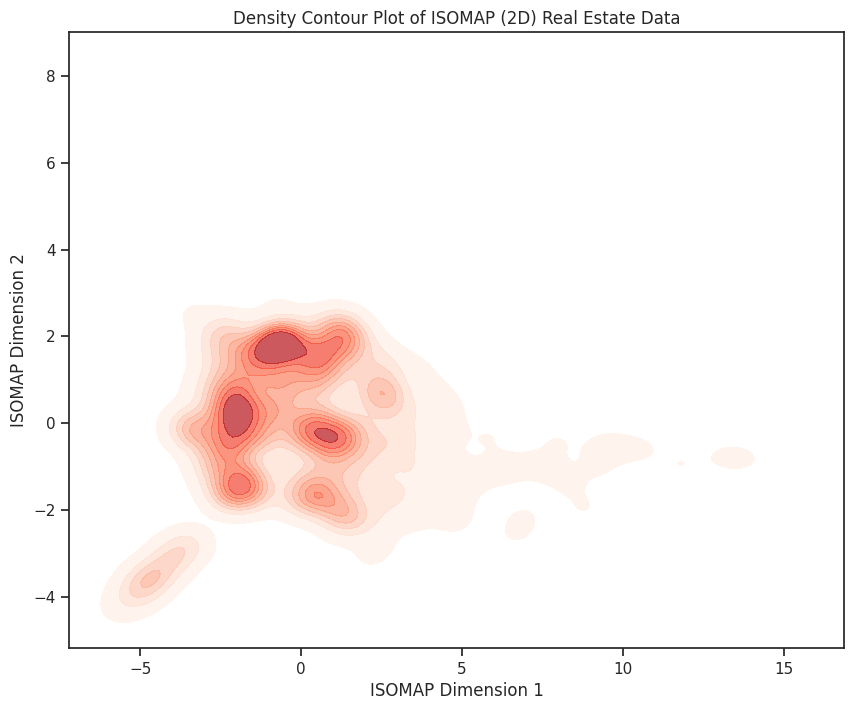

In [54]:
isomap = Isomap(n_components=2, n_neighbors=5)
isomap_result = isomap.fit_transform(data_standardized)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.figure(figsize=(10, 8))

# Creating a density plot (contour plot) for the ISOMAP results
sns.kdeplot(x=isomap_result[:, 0], y=isomap_result[:, 1], cmap="Reds", shade=True, alpha=0.7, bw_adjust=0.5)

plt.title('Density Contour Plot of ISOMAP (2D) Real Estate Data')
plt.xlabel('ISOMAP Dimension 1')
plt.ylabel('ISOMAP Dimension 2')
plt.show()

### ISOMAP Visualization Analysis

Here's a detailed explanation of the key elements of the ISOMAP visualization:

Structure of the Scatter Plot:

The plot is composed of points, each symbolizing an individual property from the real estate dataset.
These properties are positioned within a two-dimensional plane, derived from the ISOMAP transformation of the original data.
Understanding the Axes:

The axes of the plot are labeled as "ISOMAP Dimension 1" and "ISOMAP Dimension 2". These represent the dimensions obtained through ISOMAP's dimensionality reduction.
These dimensions don't correspond to physical properties but rather are conceptual, capturing the essential geometric relationships within the dataset.
Observing Data Patterns:

The spatial arrangement of points can highlight potential clusters or specific patterns, indicating similarities among properties.
Outliers, or isolated points, may indicate properties with unique or atypical characteristics compared to the rest of the dataset.
Drawing Insights:

The relative positioning of the properties in this reduced dimension space allows us to draw inferences about their similarities or differences.
Properties that appear closer in this space are likely more similar in terms of the characteristics identified by the ISOMAP algorithm.

# Overview of Locally Linear Embedding (LLE)

Locally Linear Embedding, commonly known as LLE, is a technique within the manifold learning algorithms family, specifically designed for reducing the dimensions of nonlinear data. Its effectiveness lies in revealing the hidden structure of data situated on curved manifolds, and it operates under the premise that each data point and its immediate neighbors are part of a locally linear region.

Distinctive Aspects of LLE:

Emphasis on Local Geometry:

LLE's primary focus is on retaining the local characteristics of the dataset. It hypothesizes that every point in the dataset can be linearly approximated using its closest neighbors.
Calculation of Reconstruction Weights:

Initially, LLE determines the weights that optimally reconstruct each point from its neighboring points. These weights are then utilized to map the data into a lower-dimensional space.
Capability for Nonlinear Mapping:

In contrast to linear methods such as PCA, LLE excels in unfolding nonlinear data structures. This makes it particularly adept at handling complex datasets where linear models are inadequate.

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

Applying LLE


In [57]:
data_subset = data.select_dtypes(include=['float64']).dropna().sample(n=500, random_state=0)

In [58]:
# Standardizing the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_subset)

In [59]:
# Applying LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=0)
lle_result = lle.fit_transform(data_standardized)

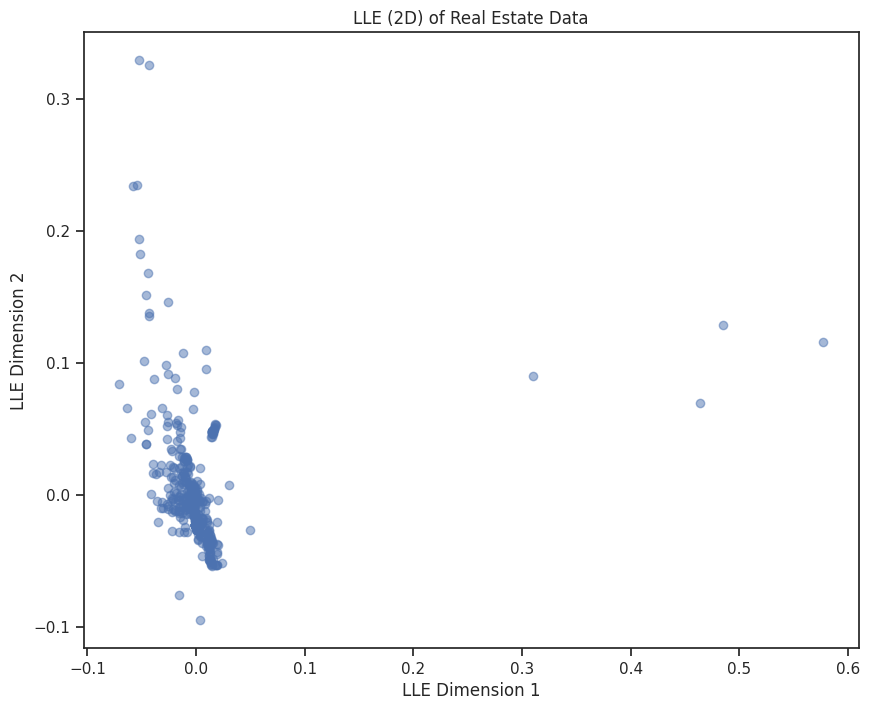

In [60]:
# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(lle_result[:, 0], lle_result[:, 1], alpha=0.5)
plt.title('LLE (2D) of Real Estate Data')
plt.xlabel('LLE Dimension 1')
plt.ylabel('LLE Dimension 2')
plt.show()

### Analysis of Locally Linear Embedding (LLE) on Real Estate Data

The Locally Linear Embedding analysis conducted on a subset of the real estate dataset focused on translating the high-dimensional characteristics of properties into a more manageable two-dimensional space. This was done while maintaining the local relationships inherent in the data. Below is a summary of the key observations and implications from this LLE analysis:

Two-Dimensional Data Representation:

Utilizing LLE, the varied numerical attributes of real estate properties were condensed into a two-dimensional framework. In this representation, each point corresponds to a property, positioned according to the algorithm's interpretation of local similarities.
Observations on Cluster Formations:

The presence of clusters within the LLE plot suggests that certain groups of properties share similar attributes, reflective of their proximity in the original, high-dimensional space. For instance, these clusters might denote properties with akin sizes, price ranges, or other relevant features.
Analysis of Relative Proximity:

The proximity of properties in this reduced space indicates similarity in local features. Properties that are closer together are likely to share more characteristics than those farther apart, aiding in the identification of commonalities among properties.
Identification of Outliers:

Properties that are markedly distant from main clusters are potential outliers. These properties could possess unique or atypical features, differentiating them from the majority of the dataset.
Considerations and Constraints:

The effectiveness and accuracy of the LLE analysis are contingent on the chosen parameters, particularly the number of nearest neighbors considered.
While reducing dimensions to a two-dimensional space aids in visualization and analysis, it may result in the loss of some complex nuances present in the original data.
The fundamental assumption of LLE that data points and their neighbors are part of a locally linear patch is critical. Deviations from this assumption could affect the accuracy of the representation.

## UMAP and t-SNE

In [61]:
!pip install umap
!pip install umap-learn[plot]

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=25560c797ea63d773b8bb87278235ae5132ed4a650cad2e254fa3d0fcb3d40fc
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=488b9b651c550d95c1b8eaa364cd59ab4142b1410a569844fb2bba612d3f8d1d
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from sklearn.datasets import make_classification

In [66]:

# Generate a synthetic dataset with 1000 samples and 20 features
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 21)])
df['Target'] = y

# Display the first few rows of the dataset
print(df.head())



   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -4.906442   3.442789   0.558964  -0.976764  -1.568805  -4.271982   
1   2.162610  -5.286651   2.609846  -1.803898  -1.831216   1.450757   
2  -4.784844  -3.744827   4.657592  -1.408806  -5.444758  -2.416013   
3  10.465024   1.070944  -3.562432  -0.849062   2.183860  -0.609893   
4   5.599516  -1.776412  -1.304322  -0.720074   5.859373  -3.292432   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_12  Feature_13  \
0  -3.727921   0.111868   2.119795   -2.522812  ...   -7.492478    4.264669   
1   2.648709   2.152307   0.524552    0.493548  ...    6.680603   -2.431830   
2   3.556495  -1.572119  -0.730549    3.447661  ...    7.961059   -5.151105   
3   0.946327  -1.046141  -2.057053   -2.056650  ...   -1.449095   -1.217685   
4   3.152205   7.099882  -3.321076    3.245486  ...    6.608729    5.632297   

   Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  Feature_19  \
0    0.304866    0.77

## t-SNE

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


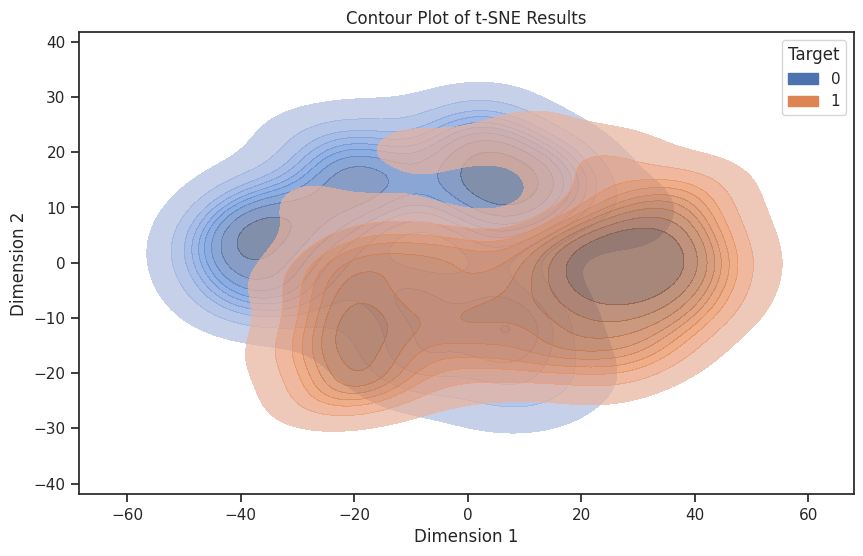

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Running t-SNE
tsne = TSNE(n_components=2, random_state=34)
X_tsne = tsne.fit_transform(df.drop('Target', axis=1))

# Preparing data for contour plot
df_tsne = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Target'] = df['Target']

# Creating a contour plot for the t-SNE results
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_tsne, x='Dimension 1', y='Dimension 2', hue='Target', cmap='viridis', fill=True, alpha=0.7)
plt.title('Contour Plot of t-SNE Results')
plt.show()

## UMAP

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


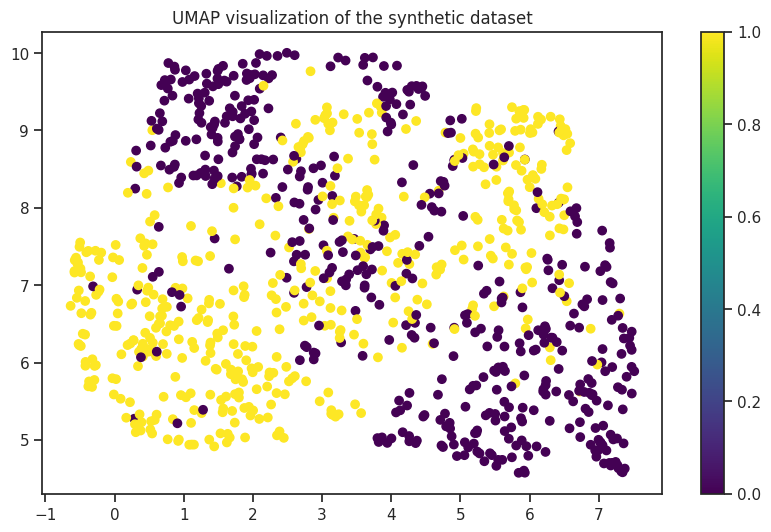

In [70]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(df.drop('Target', axis=1))

# Plotting the result
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['Target'], cmap='viridis')
plt.title('UMAP visualization of the synthetic dataset')
plt.colorbar()
plt.show()

## Hyperparmaeter Tuning with UMAP

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


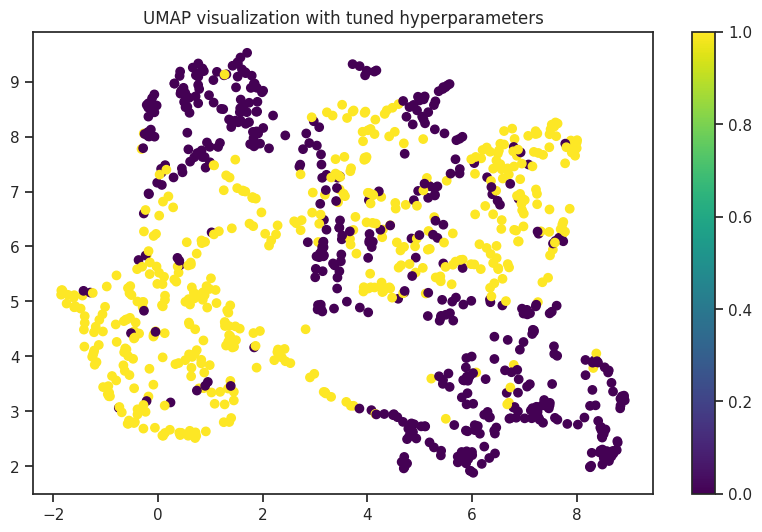

In [71]:
# Adjusting the number of neighbors
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2, random_state=42)
X_umap_tuned = umap_model.fit_transform(df.drop('Target', axis=1))

# Plotting the result
plt.figure(figsize=(10, 6))
plt.scatter(X_umap_tuned[:, 0], X_umap_tuned[:, 1], c=df['Target'], cmap='viridis')
plt.title('UMAP visualization with tuned hyperparameters')
plt.colorbar()
plt.show()
